## Fordgobike Analysis by TAOFEEQ TAOFEEQAT OLAWUMI

## OVERVIEW

### This presentation is geared towards answering the following questions;
* What is the ratio of male to female riders
* Which user_type has the highest percentage in the bike sharing system.
* whether or not they share their ride with anyone

### DATASET OVERVIEW

The cleaned fordgobike dataset consists of 183213 sample trips with 14 features (duration_hr, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, member_age, member_gender, bike_share_for_all_trip, distance_km, age_group).

The 201902-fordgobike-tripdata.csv originally contained 183412 sample trips with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

I cleaned the missing values in start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year and member_gender features. I converted start_time, end_time, bike_id, start_station_id, end_station_id and member_birth_year to their appropriate datatypes. I also calculated distance from start_station_latitude, start_station_longitude,end_station_latitude and end_station_longitude features and dropped them. I converted duration_sec to duration_hr, member_birth_year to age and created age_group from age.

In [54]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
df = pd.read_csv('fordgobike_csv')

In [57]:
df_clean = df.copy()

In [58]:
df_clean.query('member_birth_year.isna() & member_gender.isna()')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


In [59]:
df_clean.member_gender.fillna("not specified",inplace=True)

In [60]:
def get_percentage(series):
    '''Takes in a series/list and returns the percentage
        of each element to the summation of the list/series elements'''
    
    return round((series/np.sum(series)) * 100,2)

def plot_graph(df,graph_type, title ,xlabel, ylabel, ylim):
    '''Takes in a datafrme and plots either bar or pie chart

        Paramenters
        df: Dataframe
        graph_type: str
        title: str
        xlabel: str
        ylabel: str
        ylim: boolean
    
    '''
    
    if graph_type == "bar":
        df.plot.bar(rot=0,width=0.8,edgecolor="black",color=[sns.color_palette()[0],'orange','green','yellow','gold'])
    elif graph_type == 'pie':
        df.plot.pie(subplots=True) 
        
    if ylim and graph_type != "pie" :
        plt.ylim(0,100)
        
    # Add title and format it
    plt.title(title.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xlabel.title(),fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel(ylabel.title(),
               fontsize = 10, weight = "bold")
    

def feature_uniques_percentage(feature_name,graph="bar",ylim= True,
                               cal_percentage = get_percentage,graph_fun = plot_graph,df=df):
    '''Takes in string feature_name and other optional arguments 
        and plots either bar or pie chart of the feature unique
        values percentages

        Paramenters
        feature_name: str
        graph: str -- optional -- default: bar
        ylim: boolean -- optional -- default: True
        cal_percentage: function -- optional -- default: global scope get_percentage function
        graph_fun: function -- optional -- default: global scope plot_graph function
        df: dataframe -- optional -- default: global scope df
    '''
    #  get the counts of the feature unique values
    feature_df = df[feature_name].value_counts().to_frame()
    
    #  prints feature counts
    index = feature_df.index
    print(f"{feature_name} Counts --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]};',end=" ")
        
    #  changes unique values counts to percentage
    #  using the passed in percentage function: cal_percentage
    feature_df[feature_name] = cal_percentage(feature_df[feature_name])
    
    #  print out feature percentages
    print()
    print(f"{feature_name} percentage --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]}%;',end=" ")
    

    title = f"unique values percentages of {feature_name} feature " 
    #   call the graph function
    graph_fun(feature_df,graph,title,feature_name,'Percentage',ylim)

user_type Counts ---  Subscriber : 163544; Customer : 19868; 
user_type percentage ---  Subscriber : 89.17%; Customer : 10.83%; 

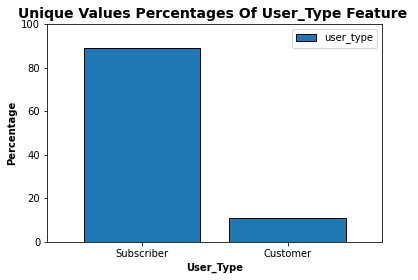

In [61]:
feature_uniques_percentage('user_type',df=df_clean)

from the above chat, it can be deduced that the number of subscribers in the fordgobike ride share is far higher than those of customers.

member_gender Counts ---  Male : 130651; Female : 40844; not specified : 8265; Other : 3652; 
member_gender percentage ---  Male : 71.23%; Female : 22.27%; not specified : 4.51%; Other : 1.99%; 

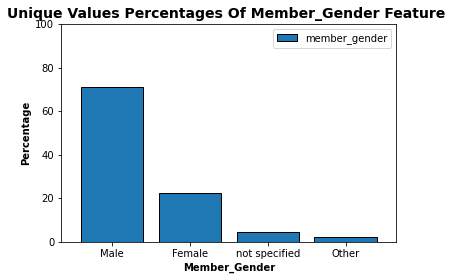

In [53]:
feature_uniques_percentage('member_gender',df=df_clean)


From the chat above, it can be deduced that the number of Males that uses the bike share system is higher than those of females. Also, from the chat, it can be seen that some genders ain't documented or specified.

bike_share_for_all_trip Counts ---  No : 165869; Yes : 17346; 
bike_share_for_all_trip percentage ---  No : 90.53%; Yes : 9.47%; 

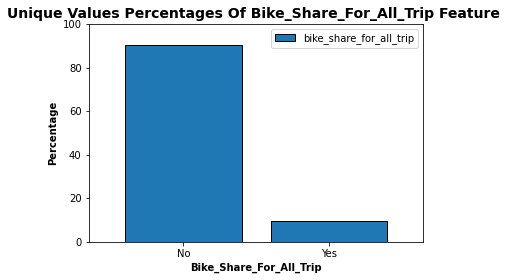

In [34]:
feature_uniques_percentage('bike_share_for_all_trip',df=df_clean)

From the chart above, it is pretty obvious that most riders in the fordbikeshare system didn't board with anyone, while very few members share with one person or the other.

In [ ]:
!jupyter nbconvert project3_slides.ipynb --to slides --post serve --no-input --no-prompt